In [1]:
import finlab

In [2]:
finlab.login(api_token='ID0hv1JVLP3bs86Qg/xslT1fwKjN0bclQVRCH7eQiAYh3e5/XNh77u3zaPDOOGJQ#vip_m')

輸入成功!


In [3]:
from finlab import data
from finlab.backtest import sim
import pandas as pd
import numpy as np

In [4]:
with finlab.data.universe('TSE_OTC'):
    benchmark = data.get('benchmark_return:發行量加權股價報酬指數', save_to_storage=True)

    #近20日跌幅平均大於1%
    close = data.get('price:收盤價')

    #投信近一日買超占成交量15%以上
    #投信持股比例小於2.5%
    invest_trust_surplus = data.get('institutional_investors_trading_summary:投信買賣超股數', save_to_storage=True)	


    volume = data.get('price:成交股數', save_to_storage=True)



 Use "pip install finlab==0.4.4" to update the latest version.


In [5]:
invest_trust_surplus

,1101,1102,1103,1104,1107,1108,1109,1110,1201,1203,...,9944,9945,9946,9949,9950,9951,9955,9958,9960,9962
date,,,,,,,,,,,,,,,,,,,,,
2012-05-02,-159000.0,8000.0,6000.0,11000.0,NaN,0.0,9000.0,3000.0,274000.0,4000.0,...,0.0,278000.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2012-05-03,13159.0,-2480.0,-44248.0,0.0,NaN,0.0,NaN,0.0,49385.0,0.0,...,0.0,-812428.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2012-05-04,-2000.0,-1000.0,-1000.0,-1000.0,NaN,0.0,-1000.0,0.0,-909000.0,-1000.0,...,0.0,457000.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2012-05-07,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,55000.0,0.0,...,0.0,263620.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
2012-05-08,-420000.0,-100000.0,0.0,0.0,NaN,0.0,0.0,0.0,-26000.0,0.0,...,0.0,150000.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-18,-176000.0,-475703.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
2023-05-19,-970000.0,-506595.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0
2023-05-22,-4725876.0,139873.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,0.0


In [6]:
condition1 = invest_trust_surplus/volume > 0.15
condition2 = invest_trust_surplus > invest_trust_surplus.shift(1).rolling(20).sum()
condition3 = (close == close.rolling(5).max()).sustain(5,2)
conditions = condition1 & condition2 & condition3

In [7]:
position= conditions
report = sim(position=position,resample = 'M',stop_loss=0.2,take_profit=0.8, position_limit=0.25, fee_ratio=1.425/1000*0.3,name="投信急買股", live_performance_start='2023-02-10', mae_mfe_window=60, upload=False)
print(report.get_stats(resample='1d', riskfree_rate=0.02)['daily_sharpe'])
print(report.get_stats(resample='1d', riskfree_rate=0.02)['max_drawdown'])
report.display()
report.display_mae_mfe_analysis()

: 

: 

c:\Program Files\Python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Text(0, 0.5, 'gmfe')

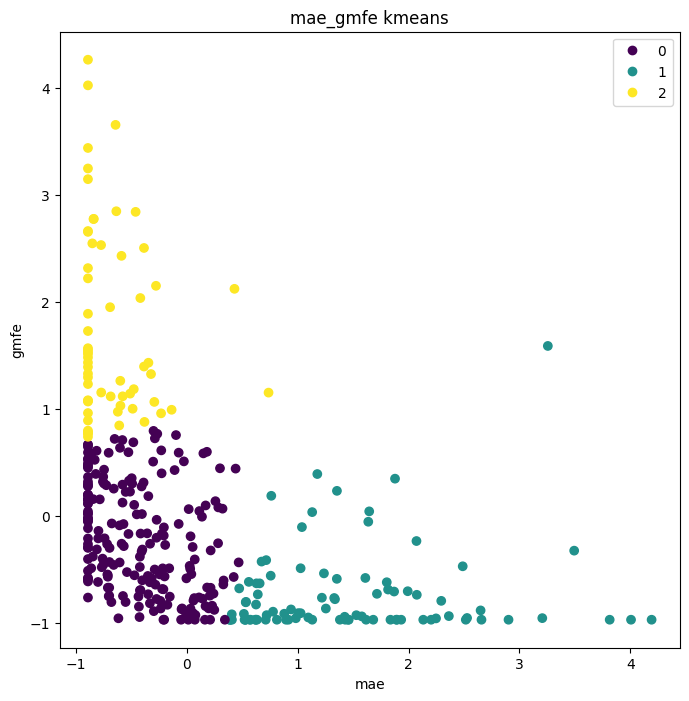

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler

def scale_data(data):
    scaler = StandardScaler().fit(data)
    X_scaled = scaler.transform(data)
    return X_scaled

# report.trades['mae'] = report.trades['mae'][report.trades['mae'].notnull()]
scale_mae = scale_data((-report.trades['mae'].values).reshape(-1, 1))
scale_gmfe = scale_data(report.trades['gmfe'].values.reshape(-1, 1))


plt.figure(figsize = (8, 8))
random_state = 100
X = np.hstack((scale_mae,scale_gmfe))
X = X[~np.isnan(X).any(axis=1)]
y_pred = KMeans(n_clusters=3,random_state=random_state).fit_predict(X)

scatter = plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.legend(*scatter.legend_elements())
plt.title("mae_gmfe kmeans")
plt.xlabel("mae")
plt.ylabel("gmfe")

In [ ]:
cluster_trades = report.trades.copy().head(361)
cluster_trades['group'] = y_pred
cluster_trades['stock_id'] = cluster_trades['stock_id'].apply(lambda s:s[:s.index(' ')])
# ana_targets = cluster_trades[cluster_trades['group'].isin([0,2])]
ana_targets = cluster_trades
ana_targets = ana_targets.reset_index().set_index(['stock_id', 'entry_sig_date'])

In [ ]:
close = data.get('price:收盤價')
open = data.get('price:開盤價')	
high = data.get('price:最高價')	
low = data.get('price:最低價')
volume = data.get('price:成交股數', save_to_storage=True)

In [ ]:
負債比率=data.get('fundamental_features:負債比率').deadline()
存貨週轉率=data.get('fundamental_features:存貨週轉率').deadline()
ROE稅後=data.get('fundamental_features:ROE稅後').deadline()
營收成長率=data.get('fundamental_features:營收成長率').deadline()
融資使用率=data.get('margin_transactions:融資使用率').fillna(0)
融券使用率=data.get('margin_transactions:融券使用率').fillna(0)

外陸資買賣超股數 = data.get('institutional_investors_trading_summary:外陸資買賣超股數(不含外資自營商)')	
外資自營商買賣超股數 = data.get('institutional_investors_trading_summary:外資自營商買賣超股數')
投信買賣超股數	= data.get('institutional_investors_trading_summary:投信買賣超股數')
自營商買賣超股數 = data.get('institutional_investors_trading_summary:自營商買賣超股數(自行買賣)')
自營商買賣超避險 = data.get('institutional_investors_trading_summary:自營商買賣超股數(避險)')
當日沖銷交易成交股數 = data.get('intraday_trading:當日沖銷交易成交股數')
當日沖銷交易買進成交金額 = data.get('intraday_trading:當日沖銷交易買進成交金額')
當日沖銷交易賣出成交金額 = data.get('intraday_trading:當日沖銷交易賣出成交金額')
集保人數 = data.get('inventory')
本益比	= data.get('price_earning_ratio:本益比')	
股價淨值比	= data.get('price_earning_ratio:股價淨值比')	
庫藏股買回總金額 = data.get('treasury_stock:本次已買回總金額')


close = data.get('price:收盤價')
open = data.get('price:開盤價')	
high = data.get('price:最高價')	
low = data.get('price:最低價')
volume = data.get('price:成交股數', save_to_storage=True)

rsi = data.indicator('rsi', timeperiod = 20)
atr = data.indicator('atr', adjust_price=True, resample='D',timeperiod=10)
adosc = data.indicator("adosc",adjust_price=False, resample="D", fastperiod=3,slowperiod=10)
upper_band = close > data.indicator("bbands", timeperiod=10)[0]
sma10 = close > close.rolling(window=10).mean()
sma20 = close > close.rolling(window=20).mean()
sma60 = close > close.rolling(window=60).mean()
vol20 = volume > volume.rolling(window=20).mean()
vol60 = volume > volume.rolling(window=60).mean()
macd = close.ewm(span=12, adjust=False).mean() - close.ewm(span=26, adjust=False).mean()
vol_cumsum = volume.rolling(20).sum()
lower_shadow = (close-low)/(open-low)

pct_change = close.pct_change()
profit = pct_change.rolling(20).mean()
risk = pct_change.rolling(20).std()
sharpe = profit / risk * (252 ** 0.5)

sheep = (close - close.shift(5)) / close.shift(5) 

atr = data.indicator('atr', adjust_price=True,timeperiod=10)
adj_close = data.get('etl:adj_close')
entry_volatility = atr/adj_close


features={'負債比率':負債比率,'存貨週轉率':存貨週轉率,'ROE稅後':ROE稅後,'營收成長率':營收成長率,'融資使用率':融資使用率,'融券使用率':融券使用率,'entry_volatility':entry_volatility,
          '外陸資買賣超股數':外陸資買賣超股數, '外資自營商買賣超股數':外資自營商買賣超股數, '投信買賣超股數':投信買賣超股數, '自營商買賣超避險':自營商買賣超避險, '自營商買賣超股數':自營商買賣超股數, 'RSI':rsi, 'ADOSC':adosc,
          'ADOSC':adosc, '布林通道上緣':upper_band, '10日均線':sma10, '20日均線':sma20, 'sma60':sma60, 'vol20':vol20,'vol60':vol60, 'macd':macd, 'vol_cumsum':vol_cumsum, 'lower_shadow':lower_shadow, '夏普':sharpe, 'sheep':sheep}

def unstack_feat(col,feat):
    reindex_date = list(set(ana_targets.index.get_level_values(1)))
    df= feat.reindex(reindex_date,method='ffill')
    df = df.unstack().to_frame()
    df.columns=[col]
    df=df.replace(np.inf,np.nan)
    return df

feats_df = pd.concat([unstack_feat(k,v) for k,v in features.items()],axis=1)
dataset = pd.concat([feats_df,ana_targets[['group']]],axis=1)
dataset.index.names = ['stock_id','date']
dataset=dataset.dropna()
dataset

,,負債比率,存貨週轉率,ROE稅後,營收成長率,融資使用率,融券使用率,entry_volatility,外陸資買賣超股數,外資自營商買賣超股數,投信買賣超股數,...,20日均線,sma60,vol20,vol60,macd,vol_cumsum,lower_shadow,夏普,sheep,group
stock_id,date,,,,,,,,,,,,,,,,,,,,,
1104,2014-11-28,18.277786,3.786709,2.391406,8.607094,3.48,0.02,0.016057,-7000.0,0.0,59000.0,...,False,False,False,False,-0.032986,9928064.0,1.000000,0.009542,-0.003731,0.0
1210,2019-07-31,47.367940,2.170891,2.184333,6.208378,1.73,0.02,0.013639,245000.0,0.0,604000.0,...,True,True,True,True,0.346768,25142387.0,12.000000,4.042631,0.029004,0.0
1216,2022-06-30,63.038243,1.859850,3.450340,7.571585,0.07,0.00,0.014378,1084800.0,0.0,2178000.0,...,True,True,True,True,0.339413,130306137.0,2.000000,1.588915,0.015152,0.0
1305,2016-06-30,44.707658,1.876421,2.847234,2.861925,5.86,0.16,0.020373,-587836.0,0.0,550000.0,...,True,True,True,True,0.066792,45839260.0,1.000000,2.159978,0.050676,0.0
1338,2016-08-31,29.391743,1.904604,2.039253,-11.311432,29.33,1.47,0.023285,-6000.0,0.0,62000.0,...,False,True,False,False,-0.628853,13133170.0,1.500000,-1.673950,0.030702,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9938,2016-12-30,42.799854,0.573472,4.157146,15.052728,5.28,0.82,0.024764,-8000.0,0.0,221000.0,...,False,False,True,False,-1.294463,17252362.0,0.545455,-0.206523,0.054144,0.0
9940,2019-05-31,62.158159,0.194371,3.683015,27.383229,0.37,0.00,0.014814,181339.0,0.0,134000.0,...,True,True,True,True,0.482278,7051731.0,2.000000,4.023097,0.043478,0.0
9942,2014-07-31,26.038156,0.683093,5.623860,26.540342,7.10,0.39,0.030083,6000.0,0.0,49000.0,...,True,False,False,False,-2.332307,5598050.0,2.000000,-1.729368,0.028807,1.0


In [ ]:
test_select = dataset.index.get_level_values('date') > '2019'
dataset_train = dataset[~test_select]
dataset_test = dataset[test_select]
dataset_test

負債比率     存貨週轉率     ROE稅後      營收成長率  融資使用率  融券使用率  \
stock_id date                                                                 
1210     2019-07-31  47.367940  2.170891  2.184333   6.208378   1.73   0.02   
1216     2022-06-30  63.038243  1.859850  3.450340   7.571585   0.07   0.00   
1457     2019-05-31  54.737205  1.255158  5.711802  -3.410898   5.51   0.12   
1590     2019-10-31  54.302093  0.586721  4.299833  -3.459437   1.94   0.47   
2015     2019-02-27  16.635201  1.357073  4.305159  52.430129   0.03   0.00   
...                        ...       ...       ...        ...    ...    ...   
9914     2022-05-31  48.694979  0.852851  6.276167   1.726392   0.39   0.01   
         2019-12-31  45.717403  1.604988  6.136185  10.502530   1.05   0.04   
         2019-10-31  47.462281  1.639115  4.117030   6.233596   1.14   0.04   
9938     2020-03-31  57.769710  0.463038  3.567917 -21.124394   4.85   0.07   
9940     2019-05-31  62.158159  0.194371  3.683015  27.383229   0.37   0.00   

                     entry_volatility   外陸資買賣超股數  外資自營商買賣超股數    投信買賣超股數  ...  \
stock_id date                                                            ...   
1210     2019-07-31          0.013639   245000.0         0.0   604000.0  ...   
1216     2022-06-30          0.014378  1084800.0         0.0  2178000.0  ...   
1457     2019-05-31          0.019132   368000.0         0.0   195000.0  ...   
1590     2019-10-31          0.027811    -5796.0         0.0   116000.0  ...   
2015     2019-02-27          0.009946    -3000.0         0.0    45000.0  ...   
...                               ...        ...         ...        ...  ...   
9914     2022-05-31          0.034656  -440800.0         0.0   400000.0  ...   
         2019-12-31          0.015332   -26000.0         0.0   101000.0  ...   
         2019-10-31          0.023809  -170577.0         0.0   366000.0  ...   
9938     2020-03-31          0.064316 -1059000.0         0.0   502000.0  ...   
9940     2019-05-31          0.014814   181339.0         0.0   134000.0  ...   

                     20日均線  sma60  vol20  vol60       macd   vol_cumsum  \
stock_id date                                                             
1210     2019-07-31   True   True   True   True   0.346768   25142387.0   
1216     2022-06-30   True   True   True   True   0.339413  130306137.0   
1457     2019-05-31   True   True  False  False   0.237230   32905269.0   
1590     2019-10-31   True   True  False  False  13.977723   31466730.0   
2015     2019-02-27   True   True  False  False   0.241085    4435444.0   
...                    ...    ...    ...    ...        ...          ...   
9914     2022-05-31   True   True   True   True   0.867438    9764990.0   
         2019-12-31   True   True  False  False   0.644361    6642367.0   
         2019-10-31   True  False   True   True  -0.498014   23326723.0   
9938     2020-03-31  False  False  False   True  -6.326767   60264500.0   
9940     2019-05-31   True   True   True   True   0.482278    7051731.0   

                    lower_shadow        夏普     sheep group  
stock_id date                                               
1210     2019-07-31    12.000000  4.042631  0.029004   0.0  
1216     2022-06-30     2.000000  1.588915  0.015152   0.0  
1457     2019-05-31     4.000000  1.896422  0.017065   0.0  
1590     2019-10-31     0.750000  3.450756  0.019536   1.0  
2015     2019-02-27     3.000000  3.305350  0.001692   0.0  
...                          ...       ...       ...   ...  
9914     2022-05-31     1.333333  2.087119  0.103814   0.0  
         2019-12-31     2.500000  1.862096  0.008571   1.0  
         2019-10-31     0.800000  2.230591  0.026239   0.0  
9938     2020-03-31     0.375000 -3.917250  0.186788   2.0  
9940     2019-05-31     2.000000  4.023097  0.043478   0.0  

[65 rows x 26 columns]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# find high mae label
label = ana_targets[-ana_targets['mae']> ana_targets['gmfe']]['group'].values[0]
features_name = list(features.keys())
cf = DecisionTreeClassifier(max_depth=3)
cf.fit(dataset_train[features_name], dataset_train['group'] ==label)

DecisionTreeClassifier(max_depth=3)

f1_score: 0.3783783783783784
precision_score(p): 0.3181818181818182
recall_score(p): 0.4666666666666667


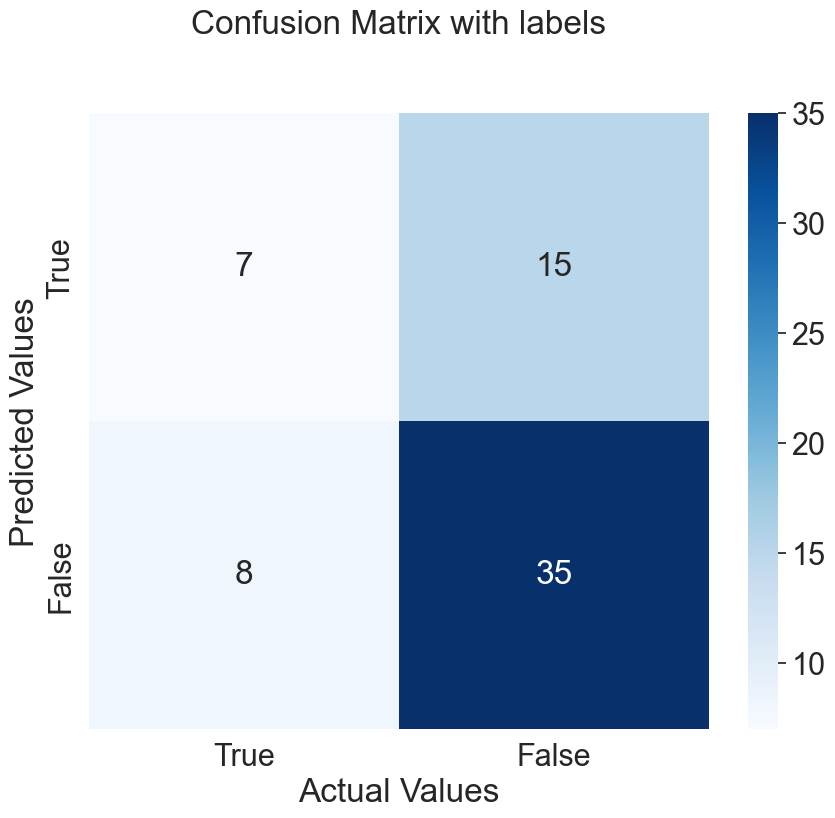

In [ ]:
import pandas as pd
from sklearn import metrics
import seaborn as sns

prediction = cf.predict(dataset_test[features_name])
confusion_matrix = metrics.confusion_matrix(dataset_test['group'] == label, prediction)
tn, fp, fn, tp = confusion_matrix.ravel()
confusion_matrix=np.array([[tp, fp],[fn,tn]])



print('f1_score:',metrics.f1_score(dataset_test['group'] == label, prediction))
print('precision_score(p):',metrics.precision_score(dataset_test['group'] == label, prediction))
print('recall_score(p):',metrics.recall_score(dataset_test['group'] == label, prediction))


plt.figure(figsize=(10, 8))
sns.set(font_scale=2)

ax = sns.heatmap(confusion_matrix, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

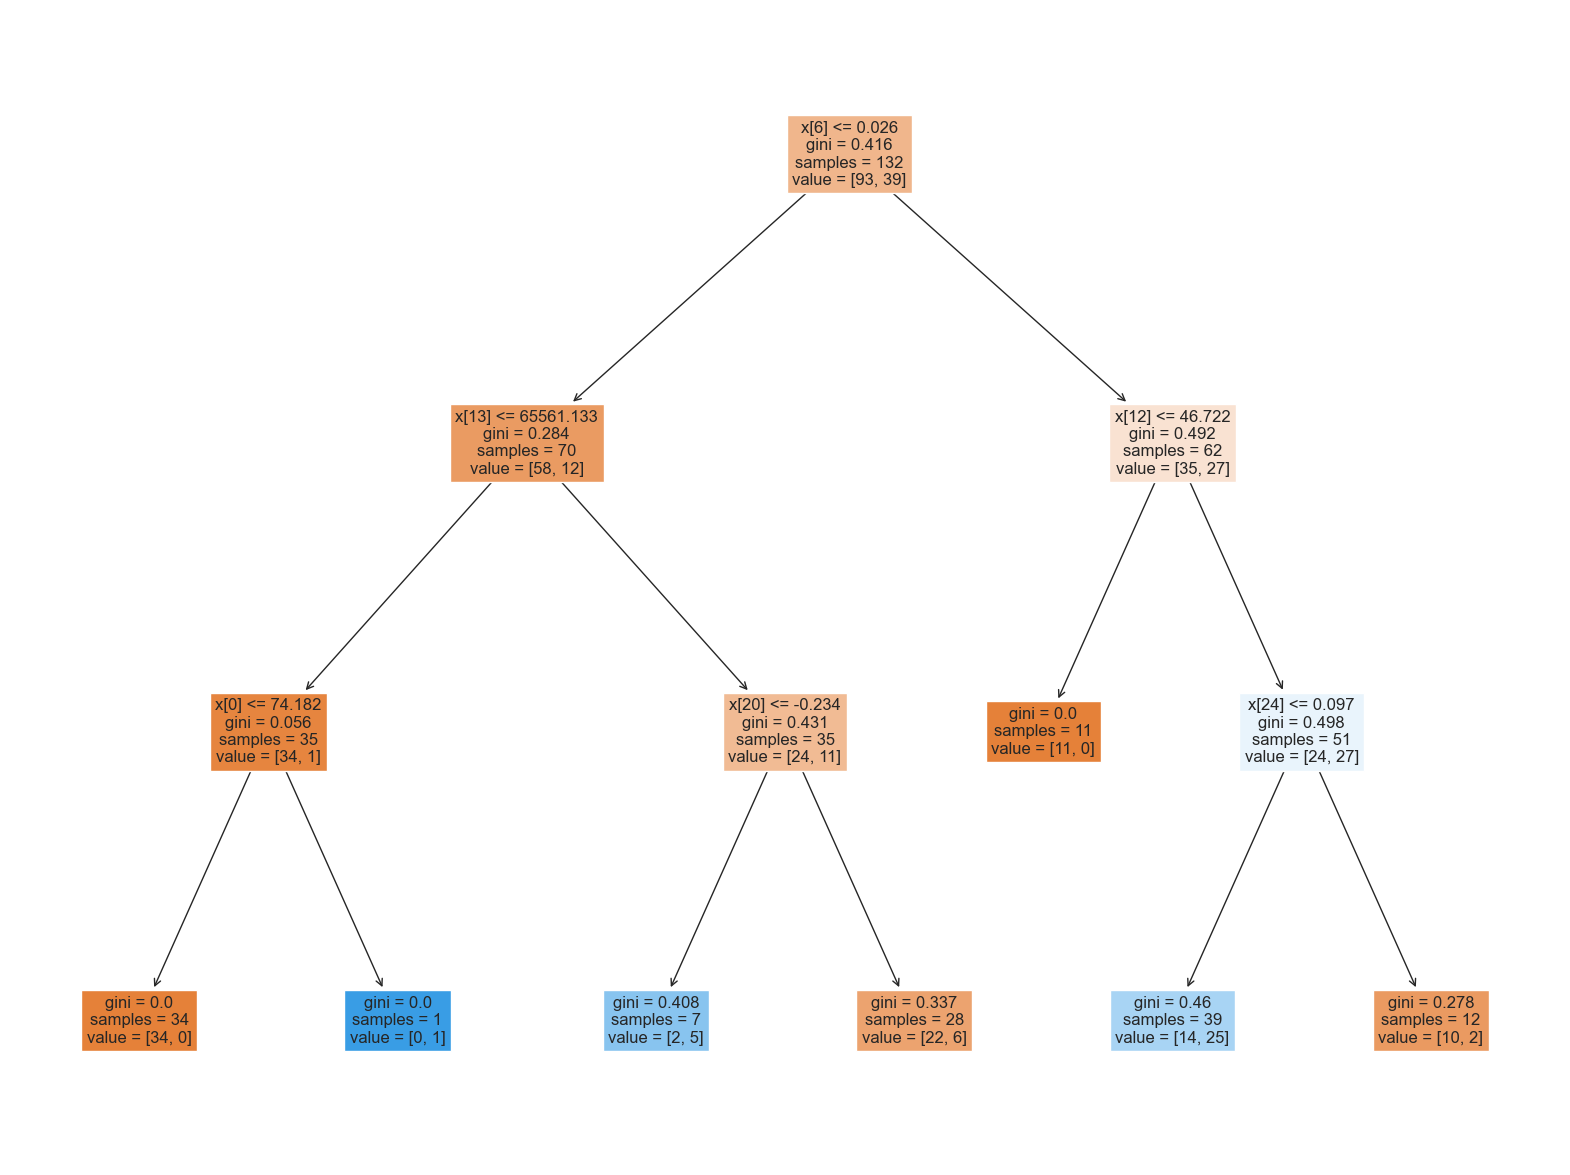

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 15))
plot_tree(cf, fontsize=12,filled=True,)
plt.show()

In [ ]:
print(features_name[6],features_name[13],features_name[12])

entry_volatility ADOSC RSI


In [ ]:
importance = pd.Series(cf.feature_importances_, index=features_name).sort_values(ascending=False)
importance

RSI                 0.237161
entry_volatility    0.214383
sheep               0.193097
ADOSC               0.133594
macd                0.130922
負債比率                0.090844
10日均線               0.000000
夏普                  0.000000
lower_shadow        0.000000
vol_cumsum          0.000000
vol60               0.000000
vol20               0.000000
sma60               0.000000
20日均線               0.000000
營收成長率               0.000000
融資使用率               0.000000
存貨週轉率               0.000000
自營商買賣超股數            0.000000
自營商買賣超避險            0.000000
投信買賣超股數             0.000000
外資自營商買賣超股數          0.000000
外陸資買賣超股數            0.000000
ROE稅後               0.000000
融券使用率               0.000000
布林通道上緣              0.000000
dtype: float64

In [ ]:
condition1 = invest_trust_surplus/volume > 0.15
condition2 = invest_trust_surplus > invest_trust_surplus.shift(1).rolling(20).sum()
condition3 = (close == close.rolling(5).max()).sustain(5,2)
conditions = condition1 & condition2 & condition3

In [ ]:
condition1 = invest_trust_surplus/volume > 0.1
condition2 = invest_trust_surplus > invest_trust_surplus.shift(1).rolling(20).sum()
condition3 = (close == close.rolling(5).max()).sustain(5,2)
conditions = condition1 & condition2 & condition3

In [ ]:
position= (conditions * (rsi<80))
position = position[position.index >= '2018-09-01']
report = sim(position=position, resample = 'M', stop_loss=0.1, touched_exit=True, position_limit=0.25, fee_ratio=1.425/1000*0.1,name="高勝率投信跟單外掛RSI過濾", live_performance_start='2023-02-10', mae_mfe_window=60, upload=True)
print(report.get_stats(resample='1d', riskfree_rate=0.02)['daily_sharpe'])
print(report.get_stats(resample='1d', riskfree_rate=0.02)['max_drawdown'])
report.display()
report.display_mae_mfe_analysis()

c:\Program Files\Python\lib\site-packages\finlab\backtest.py:316: RuntimeWarning:

invalid value encountered in double_scalars



1.2990195564977465
-0.16046382075064558


--Stats--
annualized_rate_of_return     23.01%
sharpe                           1.3
max_drawdown                 -16.05%
win_ratio                     61.83%

--Latest Position--


2357    0.125
2739    0.125
3227    0.125
3374    0.125
5483    0.125
6147    0.125
8155    0.125
8938    0.125
Name: 2023-05-31 00:00:00, dtype: float64

In [ ]:
report.trades

,stock_id,entry_date,exit_date,entry_sig_date,exit_sig_date,position,period,entry_index,exit_index,return,trade_price@entry_date,trade_price@exit_date,mae,gmfe,bmfe,mdd,pdays
trade_index,,,,,,,,,,,,,,,,,
0,5274 信驊,2018-11-01,2018-11-13,2018-10-31,2018-11-12,0.25,8.0,2856.0,2864.0,-0.044444,495.0,473.0,-0.044444,0.195960,0.195960,-0.100000,3.0
1,2351 順德,2018-11-01,2018-12-03,2018-10-31,2018-11-30,0.25,22.0,2856.0,2878.0,0.169139,67.4,78.8,-0.014837,0.169139,0.020772,-0.068531,20.0
2,2379 瑞昱,2018-11-01,2018-12-03,2018-10-31,2018-11-30,0.25,22.0,2856.0,2878.0,0.156250,128.0,148.0,-0.031250,0.156250,0.015625,-0.046154,7.0
3,3324 雙鴻,2018-11-01,2018-12-03,2018-10-31,2018-11-30,0.25,22.0,2856.0,2878.0,0.341625,60.3,80.9,0.000000,0.341625,0.000000,-0.042969,22.0
4,1536 和大,2018-12-03,2018-12-10,2018-11-30,2018-12-07,0.25,5.0,2878.0,2883.0,-0.100000,135.0,120.0,-0.100000,0.000000,0.000000,-0.100000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,3374 精材,NaT,NaT,2023-05-31,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,5483 中美晶,NaT,NaT,2023-05-31,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,6147 頎邦,NaT,NaT,2023-05-31,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1]:
import finlab
finlab.login(api_token='ID0hv1JVLP3bs86Qg/xslT1fwKjN0bclQVRCH7eQiAYh3e5/XNh77u3zaPDOOGJQ#vip_m')
from finlab import data
from finlab.backtest import sim
import pandas as pd
import numpy as np

with finlab.data.universe('TSE_OTC'):
    benchmark = data.get('benchmark_return:發行量加權股價報酬指數', save_to_storage=True)

    #近20日跌幅平均大於1%
    close = data.get('price:收盤價')

    #投信近一日買超占成交量15%以上
    #投信持股比例小於2.5%
    invest_trust_surplus = data.get('institutional_investors_trading_summary:投信買賣超股數', save_to_storage=True)	


    volume = data.get('price:成交股數', save_to_storage=True)

condition1 = invest_trust_surplus/volume > 0.1
condition2 = invest_trust_surplus > invest_trust_surplus.shift(1).rolling(20).sum()
condition3 = (close == close.rolling(5).max()).sustain(5,2)
conditions = condition1 & condition2 & condition3

# 計算隔日價差以及分類每日漲跌
隔日差價 = close.diff()
上漲 = 隔日差價.clip(lower = 0)
下跌 = (-1) * 隔日差價.clip( upper = 0)
# 20日RSI指標
二十日上漲均值 = 上漲.ewm(com = 14, adjust = False).mean()
二十日下跌均值 = 下跌.ewm(com = 14, adjust = False).mean()
rsi = 二十日上漲均值 / 二十日下跌均值
rsi = rsi.apply(lambda rs : rs/(1+rs)*100)

# rsi = data.indicator('rsi', timeperiod = 20)


position= (conditions * (rsi<80))
position = position[position.index >= '2018-01-01']

report = sim(position=position, resample = 'M', stop_loss=0.1, touched_exit=True, position_limit=0.25, fee_ratio=1.425/1000*0.3,name="高勝率投信跟單外掛RSI過濾", live_performance_start='2023-02-10', mae_mfe_window=60, upload=True)
print(report.get_stats(resample='1d', riskfree_rate=0.02)['daily_sharpe'])
print(report.get_stats(resample='1d', riskfree_rate=0.02)['max_drawdown'])
report.display()
report.display_mae_mfe_analysis()

輸入成功!


 Use "pip install finlab==0.4.4" to update the latest version.


In [21]:
report.trades

,stock_id,entry_date,exit_date,entry_sig_date,exit_sig_date,position,period,entry_index,exit_index,return,trade_price@entry_date,trade_price@exit_date,mae,gmfe,bmfe,mdd,pdays
trade_index,,,,,,,,,,,,,,,,,
0,5274 信驊,2018-11-01,2018-11-13,2018-10-31,2018-11-12,0.25,8.0,2856.0,2864.0,-0.044444,495.0,473.0,-0.044444,0.195960,0.195960,-0.100000,3.0
1,2351 順德,2018-11-01,2018-12-03,2018-10-31,2018-11-30,0.25,22.0,2856.0,2878.0,0.169139,67.4,78.8,-0.014837,0.169139,0.020772,-0.068531,20.0
2,2379 瑞昱,2018-11-01,2018-12-03,2018-10-31,2018-11-30,0.25,22.0,2856.0,2878.0,0.156250,128.0,148.0,-0.031250,0.156250,0.015625,-0.046154,7.0
3,3324 雙鴻,2018-11-01,2018-12-03,2018-10-31,2018-11-30,0.25,22.0,2856.0,2878.0,0.341625,60.3,80.9,0.000000,0.341625,0.000000,-0.042969,22.0
4,1536 和大,2018-12-03,2018-12-10,2018-11-30,2018-12-07,0.25,5.0,2878.0,2883.0,-0.100000,135.0,120.0,-0.100000,0.000000,0.000000,-0.100000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,3010 華立,NaT,NaT,2023-05-31,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,6412 群電,NaT,NaT,2023-05-31,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,6592 和潤企業,NaT,NaT,2023-05-31,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 計算隔日價差以及分類每日漲跌
隔日差價 = close.diff()
上漲 = 隔日差價.clip(lower = 0)
下跌 = (-1) * 隔日差價.clip( upper = 0)
# 20日RSI指標
二十日上漲均值 = 上漲.ewm(com = 14, adjust = False).mean()
二十日下跌均值 = 下跌.ewm(com = 14, adjust = False).mean()
rsi = 二十日上漲均值 / 二十日下跌均值
rsi = rsi.apply(lambda rs : rs/(1+rs)*100)